# GeoReference Radicalization and De-Radicalization Events  
Bilgi ekibinin hazirladigi veriyi birlesitirip geo-referanslamak

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

path = r"C:\Git_Repo\Radical_Project\DATA\D.RAD WP3 Radicalization_FINAL.xlsx"

In [43]:
excel_file = pd.ExcelFile( path )
countries = excel_file.sheet_names

df = pd.DataFrame()
for country in countries:
    # Open each sheet
    temp = pd.read_excel( path , sheet_name= country )
    temp['Location'] = temp['Location'].str.strip()
    temp['Region'] = temp['Region'].str.strip()
    temp['Country'] = country
    # Create a formated Address Column
    temp['address'] = [ "{}, {}, {}".format( r['Location'], r['Region'] , country ) if r['Location'] != r['Region'] else "{}, {}".format( r['Region'] , country ) for i,r in temp.iterrows()] 
    df = pd.concat( [df,temp] )

display( df.groupby( 'Country' ).size() )
print( f"Number of Enteries: {df.shape[0]}" )
df.head()

Country
Austria                   19
Bosnia and Herzegovina     8
Finland                    7
France                    14
Georgia                   10
Germany                   17
Hungary                   17
Iraq                      34
Israel                     3
Italy                     10
Jordan                     8
Kosovo                    15
Poland                     9
Serbia                    17
Slovenia                  15
Turkey                    22
United Kingdom            24
dtype: int64

Number of Enteries: 249


,Location,Region,Event Type,Event Description,Links,Country,address,Link,LINK,LINKS,Type
0,Turkish consulate Salzburg,Salzburg,Ethno-Nationalist,Suspected Kurdistan Workers Party (PKK) activi...,https://www.derstandard.at/story/1224255939271...,Austria,"Turkish consulate Salzburg, Salzburg, Austria",NaN,NaN,NaN,NaN
1,Kurdish Cultural Institute of Vienna,Vienna,Ethno-Nationalist,Unknown arsonists threw several Molotov cockta...,https://www.derstandard.at/story/1224776346554...,Austria,"Kurdish Cultural Institute of Vienna, Vienna, ...",NaN,NaN,NaN,NaN
2,Vienna,Vienna,Ethno-Nationalist,Turkish nationalists attacked Kurdish activist...,"Turkey, Austria in row over Kurdish protests i...",Austria,"Vienna, Austria",NaN,NaN,NaN,NaN
3,Novartis CEO's hunting lodge,"Bach, Tyrol",Left Wing Extremism,Assailants set fire to the hunting lodge of t...,https://www.reuters.com/article/idINIndia-4158...,Austria,"Novartis CEO's hunting lodge, Bach, Tyrol, Aus...",NaN,NaN,NaN,NaN
4,Wiener Ballsaison,Vienna,Left Wing Extremism,The Akademikerball (academic ball) is the repl...,https://de.wikipedia.org/wiki/Wiener_Akademike...,Austria,"Wiener Ballsaison, Vienna, Austria",NaN,NaN,NaN,NaN


Create a DF of unique locations.  
Join this with the rest of the data to remove duplicates. 

In [51]:
from IPython.display import clear_output
import geocoder
key = 'An-voFxalG766aFwhW1EKEN__IF3EcPsO2GfgciTK7MbLpemCsH0iljNM9q1UUyJ'
addresses = df['address'].drop_duplicates()

a = []
count = 0
for i,r in addresses.iteritems():
    g = geocoder.arcgis( r )
    clear_output()
    print( "%{} - {}".format( round( count*100/len(addresses),1) , r ) )
    a.append( [r , g.lat , g.lng , g.quality , g.confidence] )
    count = count + 1

locations = pd.DataFrame( data=a , columns=['address','lat','lon','quality','confidence'] )
locations.head()

%99.5 - London Bridge, LONDON, United Kingdom


,address,lat,lon,quality,confidence
0,"Turkish consulate Salzburg, Salzburg, Austria",47.80065,13.04337,Locality,3.0
1,"Kurdish Cultural Institute of Vienna, Vienna, ...",48.20263,16.36842,Locality,1.0
2,"Vienna, Austria",48.20263,16.36842,Locality,1.0
3,"Novartis CEO's hunting lodge, Bach, Tyrol, Aus...",47.27043,10.40372,Locality,3.0
4,"Wiener Ballsaison, Vienna, Austria",48.20327,16.34730,POI,7.0


In [53]:
df_locs = df.join( locations.set_index('address') , on='address' )
df_locs.head()

,Location,Region,Event Type,Event Description,Links,Country,address,Link,LINK,LINKS,Type,lat,lon,quality,confidence
0,Turkish consulate Salzburg,Salzburg,Ethno-Nationalist,Suspected Kurdistan Workers Party (PKK) activi...,https://www.derstandard.at/story/1224255939271...,Austria,"Turkish consulate Salzburg, Salzburg, Austria",NaN,NaN,NaN,NaN,47.80065,13.04337,Locality,3.0
1,Kurdish Cultural Institute of Vienna,Vienna,Ethno-Nationalist,Unknown arsonists threw several Molotov cockta...,https://www.derstandard.at/story/1224776346554...,Austria,"Kurdish Cultural Institute of Vienna, Vienna, ...",NaN,NaN,NaN,NaN,48.20263,16.36842,Locality,1.0
2,Vienna,Vienna,Ethno-Nationalist,Turkish nationalists attacked Kurdish activist...,"Turkey, Austria in row over Kurdish protests i...",Austria,"Vienna, Austria",NaN,NaN,NaN,NaN,48.20263,16.36842,Locality,1.0
3,Novartis CEO's hunting lodge,"Bach, Tyrol",Left Wing Extremism,Assailants set fire to the hunting lodge of t...,https://www.reuters.com/article/idINIndia-4158...,Austria,"Novartis CEO's hunting lodge, Bach, Tyrol, Aus...",NaN,NaN,NaN,NaN,47.27043,10.40372,Locality,3.0
4,Wiener Ballsaison,Vienna,Left Wing Extremism,The Akademikerball (academic ball) is the repl...,https://de.wikipedia.org/wiki/Wiener_Akademike...,Austria,"Wiener Ballsaison, Vienna, Austria",NaN,NaN,NaN,NaN,48.20327,16.34730,POI,7.0


Convert data to geodataframe

In [66]:
gdf = gpd.GeoDataFrame( data=df_locs , geometry=gpd.points_from_xy( df_locs['lon'] , df_locs['lat'] ) , crs=4326 )
gdf.head()

,Location,Region,Event Type,Event Description,Links,Country,address,Link,LINK,LINKS,Type,lat,lon,quality,confidence,geometry
0,Turkish consulate Salzburg,Salzburg,Ethno-Nationalist,Suspected Kurdistan Workers Party (PKK) activi...,https://www.derstandard.at/story/1224255939271...,Austria,"Turkish consulate Salzburg, Salzburg, Austria",NaN,NaN,NaN,NaN,47.80065,13.04337,Locality,3.0,POINT (13.04337 47.80065)
1,Kurdish Cultural Institute of Vienna,Vienna,Ethno-Nationalist,Unknown arsonists threw several Molotov cockta...,https://www.derstandard.at/story/1224776346554...,Austria,"Kurdish Cultural Institute of Vienna, Vienna, ...",NaN,NaN,NaN,NaN,48.20263,16.36842,Locality,1.0,POINT (16.36842 48.20263)
2,Vienna,Vienna,Ethno-Nationalist,Turkish nationalists attacked Kurdish activist...,"Turkey, Austria in row over Kurdish protests i...",Austria,"Vienna, Austria",NaN,NaN,NaN,NaN,48.20263,16.36842,Locality,1.0,POINT (16.36842 48.20263)
3,Novartis CEO's hunting lodge,"Bach, Tyrol",Left Wing Extremism,Assailants set fire to the hunting lodge of t...,https://www.reuters.com/article/idINIndia-4158...,Austria,"Novartis CEO's hunting lodge, Bach, Tyrol, Aus...",NaN,NaN,NaN,NaN,47.27043,10.40372,Locality,3.0,POINT (10.40372 47.27043)
4,Wiener Ballsaison,Vienna,Left Wing Extremism,The Akademikerball (academic ball) is the repl...,https://de.wikipedia.org/wiki/Wiener_Akademike...,Austria,"Wiener Ballsaison, Vienna, Austria",NaN,NaN,NaN,NaN,48.20327,16.34730,POI,7.0,POINT (16.34730 48.20327)


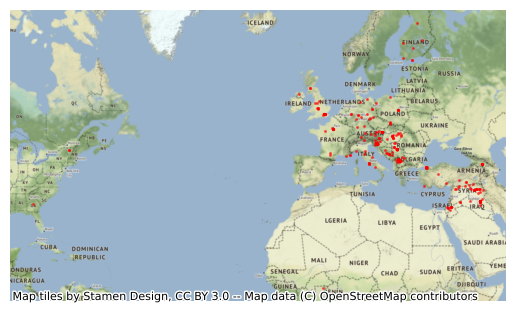

In [73]:
import contextily as cx
ax = gdf.to_crs(epsg=3857).plot( markersize=1.5 , color = 'r' , alpha = 0.5 )
cx.add_basemap(ax)
ax.axis('off');

## EXPORT

In [74]:
gdf.to_file(
    'C:\Git_Repo\Radical_Project\DATA\Radical_Locations.geojson',
    driver = 'GeoJSON',
    encoding = 'utf-8'
)

## Import and Folium

In [112]:
data = gpd.read_file( 'C:\Git_Repo\Radical_Project\DATA\Radical_Locations.geojson' )
data.head()

,Location,Region,Event Type,Event Description,Links,Country,address,Link,Type,lat,lon,quality,confidence,geometry
0,Turkish consulate Salzburg,Salzburg,Ethno-Nationalist,Suspected Kurdistan Workers Party (PKK) activi...,None,Austria,"Turkish consulate Salzburg, Salzburg, Austria",None,None,47.80065,13.04337,Locality,3.0,POINT (13.04337 47.80065)
1,Kurdish Cultural Institute of Vienna,Vienna,Ethno-Nationalist,Unknown arsonists threw several Molotov cockta...,None,Austria,"Kurdish Cultural Institute of Vienna, Vienna, ...",None,None,48.20263,16.36842,Locality,1.0,POINT (16.36842 48.20263)
2,Vienna,Vienna,Ethno-Nationalist,Turkish nationalists attacked Kurdish activist...,None,Austria,"Vienna, Austria",None,None,48.20263,16.36842,Locality,1.0,POINT (16.36842 48.20263)
3,Novartis CEO's hunting lodge,"Bach, Tyrol",Left Wing Extremism,Assailants set fire to the hunting lodge of t...,None,Austria,"Novartis CEO's hunting lodge, Bach, Tyrol, Aus...",None,None,47.27043,10.40372,Locality,3.0,POINT (10.40372 47.27043)
4,Wiener Ballsaison,Vienna,Left Wing Extremism,The Akademikerball (academic ball) is the repl...,None,Austria,"Wiener Ballsaison, Vienna, Austria",None,None,48.20327,16.34730,POI,7.0,POINT (16.34730 48.20327)


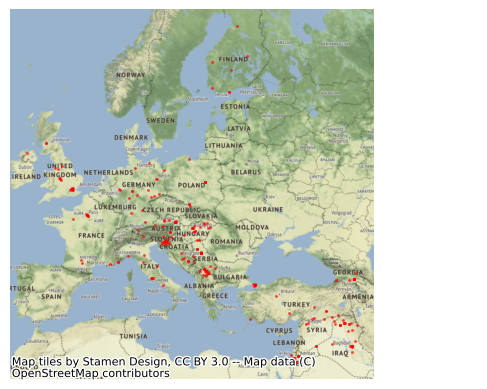

In [113]:
ax = data.to_crs(epsg=3857).plot( markersize=1.5 , color = 'r' , alpha = 0.5 )
cx.add_basemap(ax)
ax.axis('off');

In [126]:
import folium

m = folium.Map(location=[45,25],zoom_start=4)

for i,r in data.dropna( axis=0 , subset=['lat','lon']).iterrows():

    m.add_child(
        folium.Circle(
            location= (r.geometry.y,r.geometry.x),
            radius = 5000,
            color='crimson',
            fill = True,
            popup=
                "<b>Event Description: </b> " + str( " ".join( r['Event Description'].split(" ")[:10] ) + " ..." ) + "<br>"
                + "<b>Address: </b>" + str( r['address']) + "<br>"
                + "<b>Country: </b>" + str( r['Country']) + "<br>"
                + "<b>Location Quality: </b>" + str( r['quality']) + "<br>"
                + "<b>Location Conf.: </b>" + str( r['confidence']) + "<br>"
        )
    )

m

In [127]:
m.save( r'C:\Git_Repo\Radical_Project\index.html')